In [2]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt
from Tomography_qutrit import*

100%|██████████| 100/100 [04:10<00:00,  2.51s/it]

Mean fidelity: [0.43429722 0.9266595  0.99987982] 	Std fidelity: [0.25633065 0.18727248 0.00113852]
Mean svx for protocol: [1.00000000e+00 4.62832999e-02 5.54850767e-04] 	Std s_cvx for protocol: [0.         0.1373501  0.00543393]



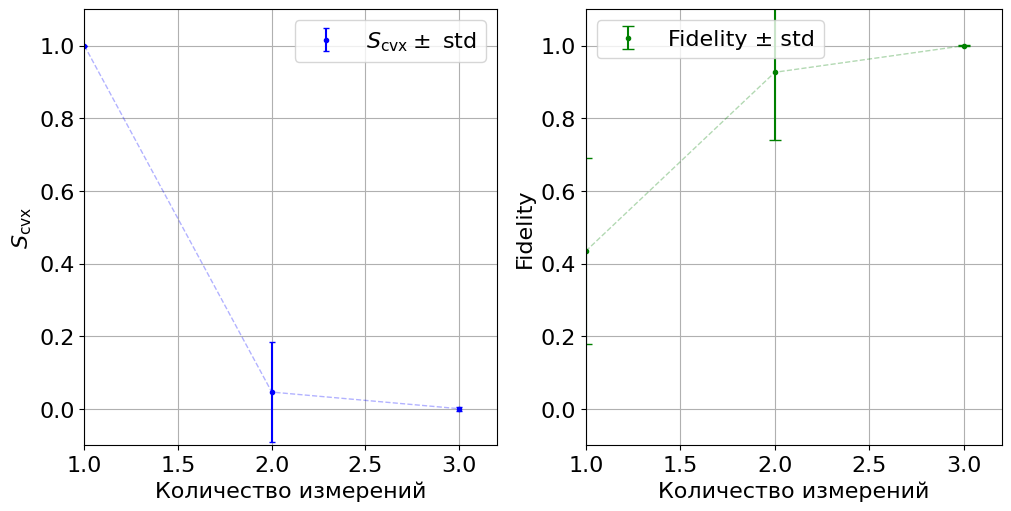

In [8]:

from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 16,          # Размер подписей осей
    'xtick.labelsize': 16,         # Размер цифр на оси X
    'ytick.labelsize': 16,         # Размер цифр на оси Y
    'legend.fontsize': 16          # Размер шрифта легенды
})

protocol = [Gl_2(pi / 8), Gl_2(pi / 8) @ Gl_8(0), diag((1,1,1))]

tomography_1 = ACT(protocol, 1, 3)
x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 100


for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max, x_min_list, x_max_list, state_ml = tomography_1.main(epsilon=10**-5)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]), tomography_1.Fidelity(x_min_list[2], x_max_list[2])]#, tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
print()
pl_fid_s_cvx(x, y, std, fidelity_mean, fidelity_std)